In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
import seaborn
import collections
import math
import statistics

#Set parameters
%matplotlib inline
pd.options.display.max_rows = 30

In [2]:
# Load data from csv file
df = pd.read_csv('/Users/pradeepipol/Music/PROJECTS/developer_survey_2019/survey_results_public.csv', low_memory=False)



In [3]:
# Count of Null values in LanguageWorkedWith and LanguageDesireNextYear columns
print(f'Number of null values in Main Branch column: {np.sum(df.MainBranch.isnull() == True)}')
print(f'Number of null values in b ConvertedComp column: {np.sum(df.ConvertedComp.isnull() == True)}')

Number of null values in Main Branch column: 552
Number of null values in b ConvertedComp column: 33060


In [4]:
# Drop rows with null ConvertedComp value
df.dropna(axis=0, subset=['ConvertedComp'], inplace=True)

In [5]:
df.fillna(value='Not Available', inplace=True)

In [6]:
# US respondents
df_us = df.loc[df.Country == 'United States']

In [7]:
# NON US respondents
df_non_us = df.loc[df.Country != 'United States']

## 1. Top paid programming languages 

In [8]:
# Retrieve all languages in dataset
all_langs = {}
for row in df.LanguageWorkedWith:
    langs = row.split(';')
    for lang in langs:
        all_langs.setdefault(lang, int())
        all_langs[lang] += 1

In [9]:
# Store salary for each language in list
sal_us = {}
for langs,sal in zip(df_us.LanguageWorkedWith, df_us.ConvertedComp):
    for lang in str(langs).split(';'):
        sal_us.setdefault(lang, [])
        sal_us[lang].append(sal)

In [10]:
# Store salary for each language in list
sal_non_us = {}
for langs,sal in zip(df_non_us.LanguageWorkedWith, df_non_us.ConvertedComp):
    for lang in str(langs).split(';'):
        sal_non_us.setdefault(lang, [])
        sal_non_us[lang].append(sal)

In [11]:
# Dataframe for storing salary info for language in USA and outside USA
lang_salary = pd.DataFrame(index=all_langs.keys(), columns=['USA', 'NON-USA'], dtype='float')

In [12]:
# Store median salary in dataframe
for lang, sal in sal_us.items():
    lang_salary.at[lang, 'USA'] = statistics.median(sal)

In [13]:
# Store median salary in dataframe
for lang, sal in sal_non_us.items():
    lang_salary.at[lang, 'NON-USA'] = statistics.median(sal)

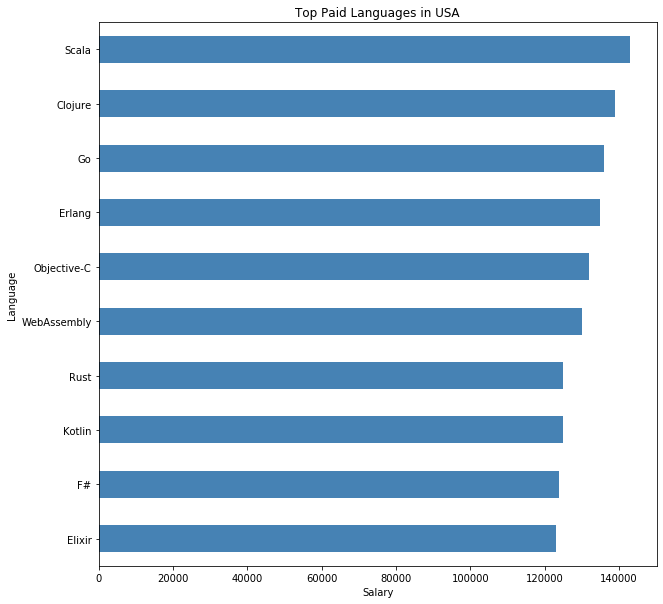

In [15]:
# Plot for USA respondents
fig = lang_salary.nlargest(10, 'USA').USA.plot(kind='barh', figsize=(10,10), color='steelblue');
fig.invert_yaxis()
plt.title('Top Paid Languages in USA');
plt.ylabel('Language');
plt.xlabel('Salary');

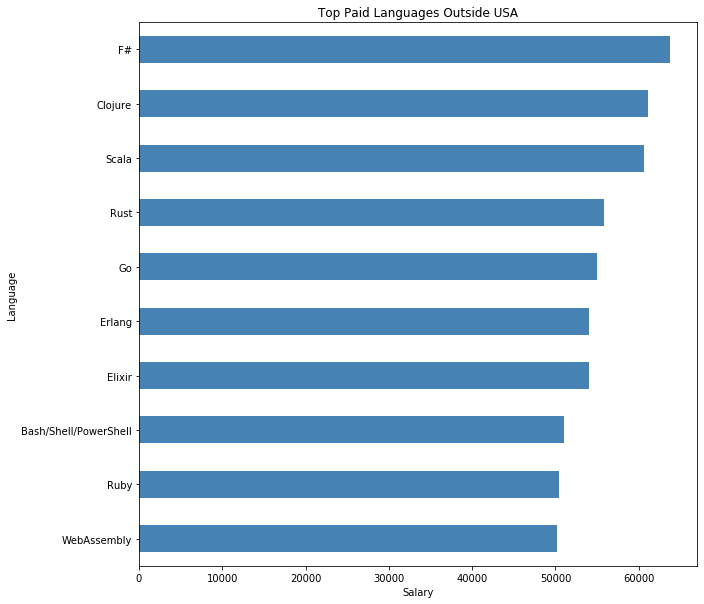

In [16]:
# Plot for Outside USA respondents
fig = lang_salary.nlargest(10, 'NON-USA')['NON-USA'].plot(kind='barh', figsize=(10,10), color='steelblue');
fig.invert_yaxis()
plt.title('Top Paid Languages Outside USA');
plt.ylabel('Language');
plt.xlabel('Salary');